# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 12 - przekształcenia






### Zadanie 1

1) Utwórz macierz (zbiór punktów) reprezentującą figurę geometryczną, składającą się z minimum 4 punktów, której "punkt centralny" (na oko) znajduje się w punkcie `(0, 0)`.

2) Wyświetl utworzoną figurę na wykresie.

> Podpowiedź: możesz użyć funkcji [`plt.fill`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill.html)

Kolejne zadania wykonuj używając macierz utworzoną w tym zadaniu (chyba, że podano inaczej).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
k = np.array([[-1,-1,1,1],[-1,1,1,-1]])
k

array([[-1, -1,  1,  1],
       [-1,  1,  1, -1]])

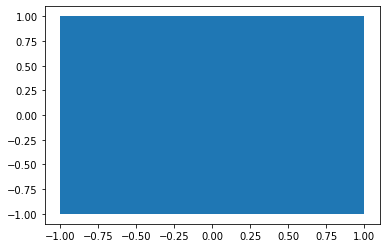

In [2]:
plt.fill(k[0,:],k[1,:])

### Zadanie 2

Aby wykonać przekształcenie należy pomnożyć macierz przekształcaną przez _mecierz przekształcenia_. Poniżej wymienione są przykładowe macierze przekształceń pozwalające wykonać tranformacje:

Obrót o kąt $\theta$:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta\\
\text{sin}\theta & \text{cos}\theta
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0x$:

$$
A_k = \begin{pmatrix}
k & 0\\
0 & 1
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}
$$

Rozciągnięcie w proporcji $k_x$ wzdłuż osi $0x$ i w proporcji $k_y$ wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
k_x & 0\\
0 & k_y
\end{pmatrix}
$$

Pochylenie względem osi $0y$:

$$
A_k = \begin{pmatrix}
1 & k\\
0 & 1
\end{pmatrix}
$$

Pochylenie względem osi $0x$:

$$
A_k = \begin{pmatrix}
1 & 0\\
k & 1
\end{pmatrix}
$$



**Polecenie**

Utwórz trzy animacje dla obrotu, rozciągnięcia i pochylenia (odpowiednio).


Przykład:

<div style="display: flex; flex-direction: row; flex-wrap: wrap; justify-content: center; width:100%;">
<img src="./Figure_2_rot.gif" height="300" width="300" />
<img src="./Figure_2_strech.gif" height="300" width="300" />
<img src="./Figure_2_shear.gif" height="300" width="300" />
</div>


<IPython.core.display.Javascript object>


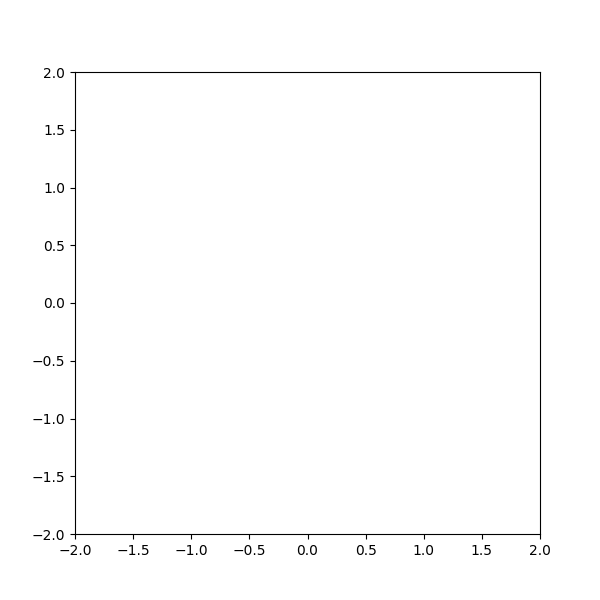

In [3]:
import matplotlib.animation
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)


def animate(deg):
    deg = deg
    rot = np.array([[np.cos(np.radians(deg)),-1*np.sin(np.radians(deg))],
                    [np.sin(np.radians(deg)),np.cos(np.radians(deg)) ]])
    krot = rot @ k
    plt.clf()
    plt.fill(krot[0,:],krot[1,:])  
  
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=90, interval=33, repeat=True) 
plt.show()

<IPython.core.display.Javascript object>


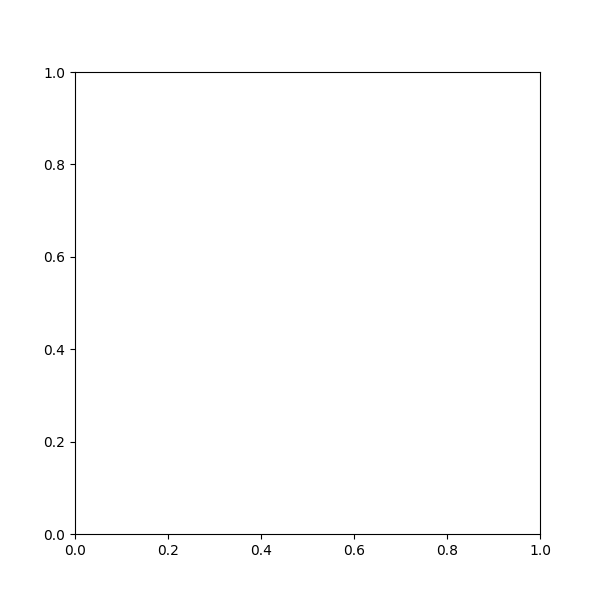

c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\matplotlib\animation.py:890: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  'Animation was deleted without rendering anything. This is '


In [4]:
def animate(a):
    a = a/10
    ox = np.array([[a, 0],
                    [0,1]])
    kox = ox @ k
    plt.clf()
    plt.xlim(-5,5)
    plt.ylim(-2,2)
    plt.fill(kox[0,:],kox[1,:])  

fig, ax = plt.subplots(figsize=(6,6))



ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40, interval=33, repeat=True) 
plt.show()

<IPython.core.display.Javascript object>


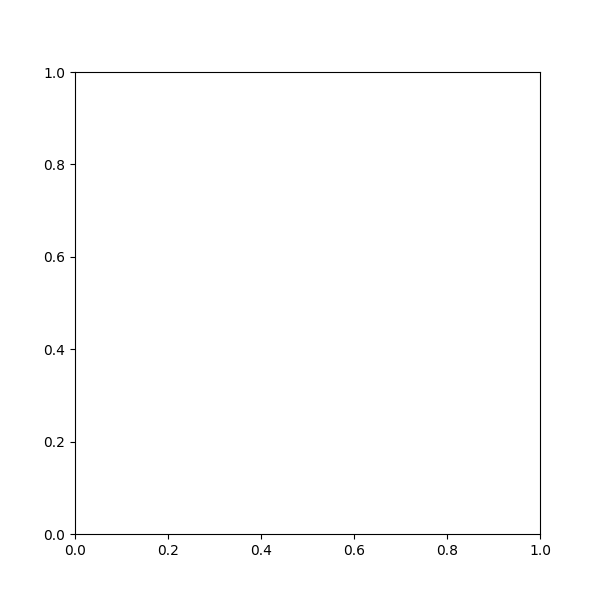

In [5]:
def animate(a):
    w = a/10
    opy = np.array([[1, w],
                [0,1]])
    kopy = opy @ k

    plt.clf()
    plt.xlim(-5,5)
    plt.ylim(-2,2)
    plt.fill(kopy[0,:],kopy[1,:])

fig, ax = plt.subplots(figsize=(6,6))



ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40, interval=33, repeat=True) 
plt.show()

### Zadanie 3 (przekształcenia afiniczne)

Przekształcenia afiniczne pozwalają na wykonywanie operacji _translacji_ i łączenia jej z innymi operacjami przekształcenia. 
Aby wykonać przekształcenie afiniczne należy zmienić reprezentację punktu $(x, y) \in R^2$ na $(x, y, 1) \in R^3$. W ten sposób macierz przekształceń osiąga wymiar 3x3. Macierz pozwalająca wykonanie operacji translacji (przesunięcie o wektor $[k_x, k_y]$) wygląda wtedy następująco:

$$
A_k = \begin{pmatrix}
1 & 0 & k_x \\
0 & 1 & k_y \\
0 & 0 & 1
\end{pmatrix}
$$


Pozostałe operacje analogicznie jak wcześniej, np. operacja obrotu:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Polecenie**

Wykonaj animację, gdzie operacja translacji oraz obrotu są wykonywane za pomocą jednej operacji macierzowej.

> Podpowiedź: należy "połączyć" macierze przekształceń w jedną.


Przykład:

<img src="./Figure_3.gif" height="300" width="300" />

In [6]:
k = np.array([[-1,-1,1,1],[-1,1,1,-1],[1,1,1,1]])
k

array([[-1, -1,  1,  1],
       [-1,  1,  1, -1],
       [ 1,  1,  1,  1]])

<IPython.core.display.Javascript object>


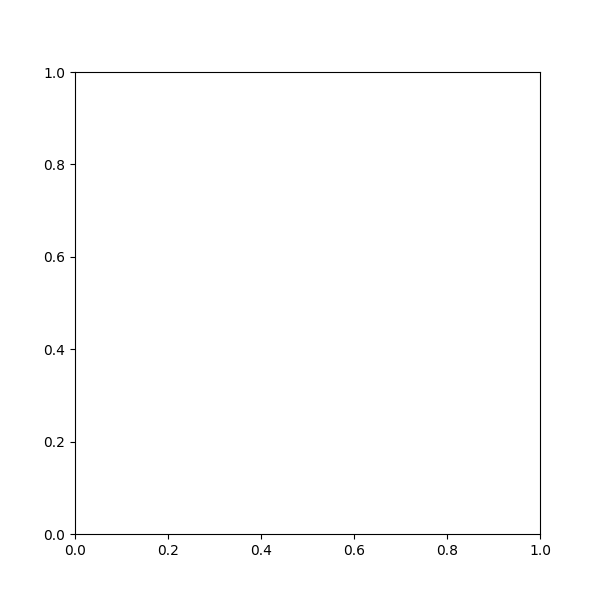

In [7]:
def animate(a):
    deg = a*2
    a= a/10
    rot = np.array([[np.cos(np.radians(deg)),-1*np.sin(np.radians(deg)),a],
                    [np.sin(np.radians(deg)),np.cos(np.radians(deg)),a ],
                   [0,0,1]])
    krot = rot @ k
    plt.clf()
    plt.xlim(-2,7)
    plt.ylim(-2,7)
    plt.fill(krot[0,:],krot[1,:])

fig, ax = plt.subplots(figsize=(6,6))



ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40, interval=33, repeat=True) 
plt.show()

### Zadanie 4 (przekształcenia macierzowe w 3D)

1) Utwórz prostą figurę geometryczną złożoną z 8 punktów w przestrzeni 3D (podobnie jak w pierwszym zadaniu).

2) Utwórz animację obrotu figury względem osi $0z$.

> Aby wykonać taki obrót należy użyć poniższej macierzy przekształceń:
$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Przykład**


<img src="./Figure_4.gif" height="300" width="300" />

In [8]:
k = np.array([[-1,-1,-1,-1, 1, 1, 1, 1],
              [-1,-1, 1, 1,-1,-1, 1, 1],
              [-1, 1,-1, 1,-1, 1,-1, 1]])
k

array([[-1, -1, -1, -1,  1,  1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1,  1, -1,  1, -1,  1, -1,  1]])

<IPython.core.display.Javascript object>


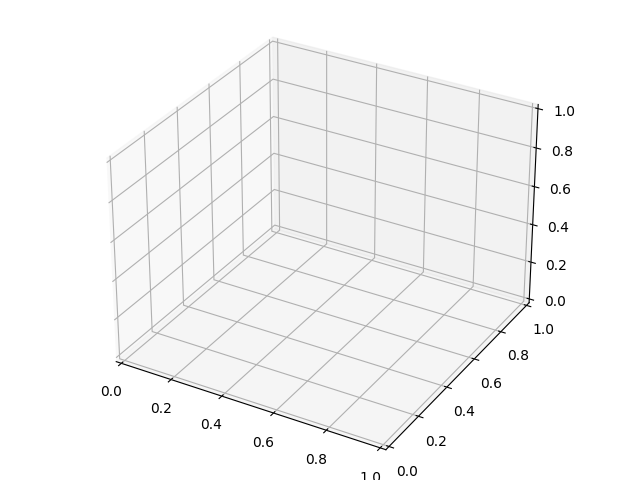

c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


In [9]:
import mpl_toolkits.mplot3d.axes3d as p3
def animate(a):
    deg = a*2
    rot = np.array([[np.cos(np.radians(deg)),-1*np.sin(np.radians(deg)),0],
                    [np.sin(np.radians(deg)),np.cos(np.radians(deg)),0 ],
                   [0,0,1]])
    ko = rot @ k
    plt.clf()
    ax = p3.Axes3D(fig)
    ax.set_ylim3d([-4,4])
    ax.set_zlim3d([-4,4])
    ax.set_xlim3d([-4,4])
    ax.scatter(ko[0,:], ko[1,:], ko[2,:])

fig = plt.figure()
ax = p3.Axes3D(fig)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=33, repeat=True) 
plt.show()

### Zadanie 5

Połącz punkty (jeżeli nie zrobiłeś wcześniej) figury z poprzedniego zadania.

**Przykład**


<img src="./Figure_5.gif" height="300" width="300" />

<IPython.core.display.Javascript object>


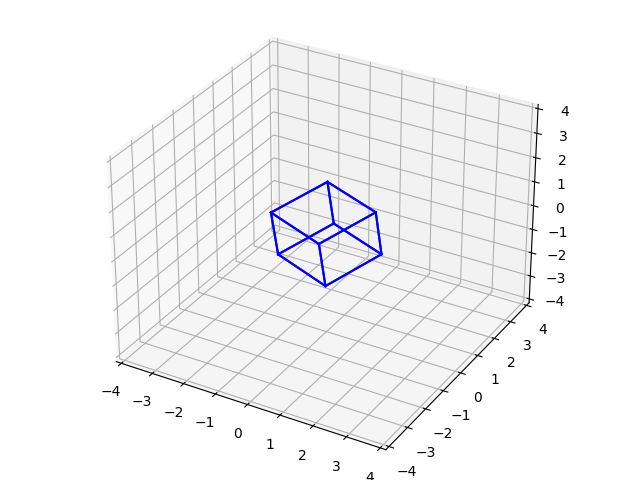

c:\users\weap\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


In [10]:
def animate(a):
    deg = a*5
    rot = np.array([[np.cos(np.radians(deg)),-1*np.sin(np.radians(deg)),0],
                    [np.sin(np.radians(deg)),np.cos(np.radians(deg)),0 ],
                   [0,0,1]])
    ko = rot @ k
    rot = np.array([[1,0,0],
                    [0,np.cos(np.radians(deg/2)),-1*np.sin(np.radians(deg/2))],
                    [0,np.sin(np.radians(deg/2)),np.cos(np.radians(deg/2))]])
    ko = rot @ ko
    
    plt.clf()
    ax = p3.Axes3D(fig)
    ax.set_ylim3d([-4,4])
    ax.set_zlim3d([-4,4])
    ax.set_xlim3d([-4,4])

    for p in range(k.shape[1]):
        for b in range(k.shape[1]):
            if np.linalg.norm(k[:,p] - k[:,b]) == 2:
                ax.plot(ko[0,[p,b]], ko[1,[p,b]], ko[2,[p,b]], c='b')

    
fig = plt.figure()
ax = p3.Axes3D(fig)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=80, interval=33, repeat=True) 
plt.show()